In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

In [26]:
df = pd.read_csv('results_micro.csv')
df.head()

,Unnamed: 0,model,type,accuracy,precision,recall,f1
0,0,7b_sft,none_conditioned,0.309533,0.309533,0.309533,0.309533
1,1,7b_sft,country_conditioned,0.308393,0.308393,0.308393,0.308393
2,2,7b_sft,value_conditioned,0.309533,0.309533,0.309533,0.309533
3,3,7b_sft,rot_conditioned,0.311052,0.311052,0.311052,0.311052
4,4,7b_sft_ppo,none_conditioned,0.331561,0.331561,0.331561,0.331561


In [27]:
models = df['model'].unique()


In [28]:
value_df = df[df['type'] == 'country_conditioned'].reset_index()

In [29]:
value_df = value_df[:12]

In [30]:
value_df

,index,Unnamed: 0,model,type,accuracy,precision,recall,f1
0,1,1,7b_sft,country_conditioned,0.308393,0.308393,0.308393,0.308393
1,5,5,7b_sft_ppo,country_conditioned,0.323205,0.323205,0.323205,0.323205
2,9,9,7b_sft_dpo,country_conditioned,0.368401,0.368401,0.368401,0.368401
3,13,13,7b_sft_kto,country_conditioned,0.360425,0.360425,0.360425,0.360425
4,17,17,13b_sft,country_conditioned,0.355108,0.355108,0.355108,0.355108
5,21,21,13b_sft_ppo,country_conditioned,0.309533,0.309533,0.309533,0.309533
6,25,25,13b_sft_dpo,country_conditioned,0.310292,0.310292,0.310292,0.310292
7,29,29,13b_sft_kto,country_conditioned,0.316369,0.316369,0.316369,0.316369
8,33,33,30b_sft,country_conditioned,0.309533,0.309533,0.309533,0.309533
9,37,37,30b_sft_ppo,country_conditioned,0.309533,0.309533,0.309533,0.309533


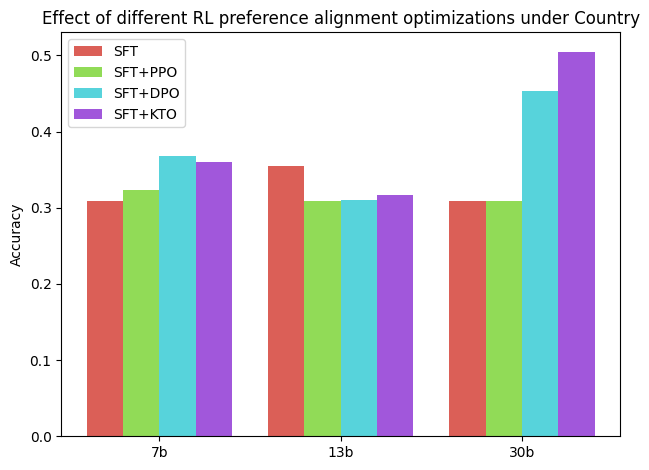

In [31]:
models = ['7b', '13b', '30b']
submodels = ['_sft', '_sft_ppo', '_sft_dpo', '_sft_kto']
accuracies = {mod: val for mod, val in zip(value_df["model"], value_df["accuracy"])}


colors = sns.color_palette('hls', 4) 
legend_labels = ['SFT', 'SFT+PPO', 'SFT+DPO', 'SFT+KTO']
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots()
rects = []

for i, submodel in enumerate(submodels):
    accuracies_submodel = [accuracies[model + submodel] for model in models]
    rects.append(ax.bar(x - 3/2*width + i*width, accuracies_submodel, width, label=legend_labels[i], color=colors[i]))

ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_title('Effect of different RL preference alignment optimizations under Country')
ax.legend()

fig.tight_layout()
plt.savefig("alignment_country.pdf", bbox_inches="tight")
plt.show()